In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

In [2]:
with open('jeju_all.bin', 'rb') as f:
    jeju = pickle.load(f)

In [3]:
jeju.tail(3)

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,...,NumofDisSpent,POINT_X,POINT_Y,lon,lat,lon_lat,dong,Category,dong_cat,Time_cut
278934,278935,278935,202008,제주특별자치도,서귀포시,영세,교육/육아,x,110000,0,...,0,921003.9820,1.476178e+06,126.65174159048293,33.27407883370635,126.65174159048293_33.27407883370635,남원읍,교육/육아,남원읍,무승인거래
279537,279538,279538,202008,제주특별자치도,서귀포시,영세,생활/기타,x,50000,0,...,0,937500.1674,1.486053e+06,126.82818252032293,33.36422597166204,126.82818252032293_33.36422597166204,성산읍,생활/기타,성산읍,무승인거래
279784,279785,279785,202008,제주특별자치도,제주시,영세,여행/숙박,x,17470,0,...,0,941114.0531,1.503713e+06,126.86586853032782,33.52371304945294,126.86586853032782_33.52371304945294,구좌읍,여행/숙박,구좌읍,무승인거래


In [57]:
# 그래프를 좀 더 선명하게
%config InlineBackend.figure_format = 'retina'

## matplotlib 한글

In [45]:
import matplotlib as mpl
from matplotlib import font_manager as fm
from matplotlib import pyplot as plt
from matplotlib import rc

### FontProperties
* 그래프에서 부분별로 폰트를 적용할 수 있다.
* 매번 적용해줘야하는 불편함이 있다.

<ipython-input-40-55ab080e6fcf>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


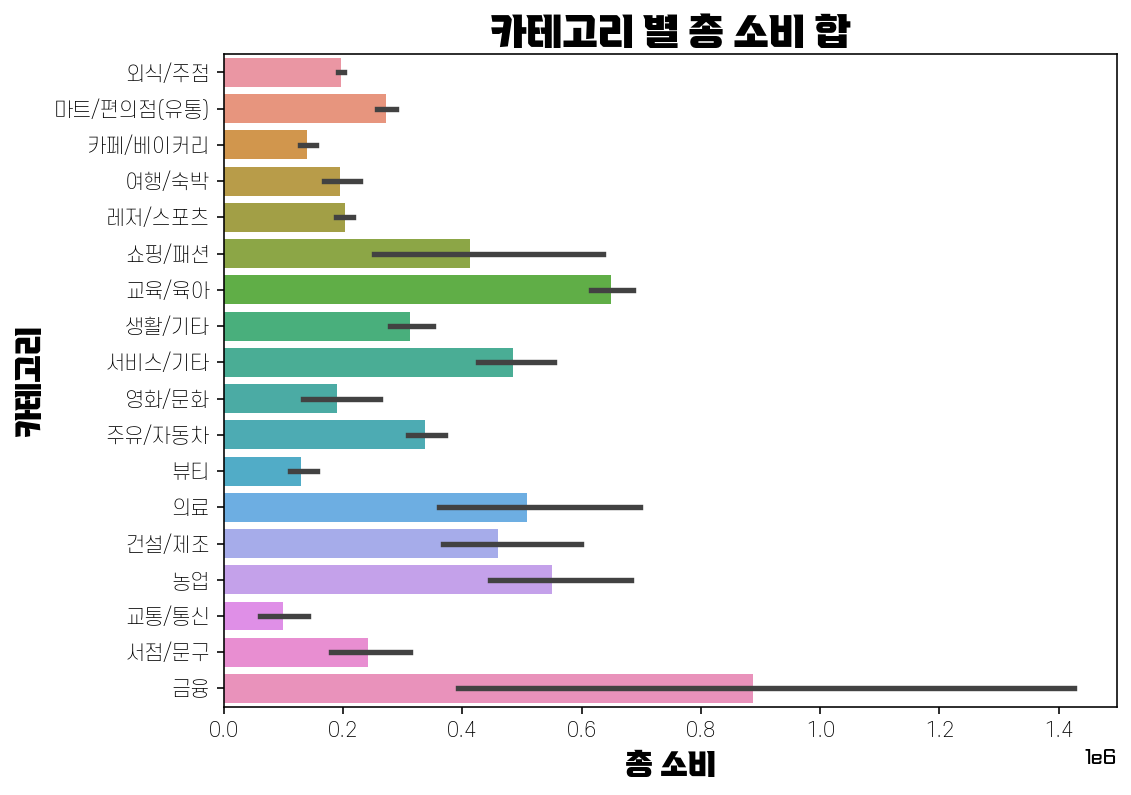

In [40]:
# 폰트 특성 setup
font_path_bitro =  '/Users/simon/Library/Fonts/비트로 코어 OTF.otf'
font_path_sc2 = '/Users/simon/Library/Fonts/SCDream2.otf'

fp_tick_label = fm.FontProperties(fname=font_path_sc2, size=10)
fp_label = fm.FontProperties(fname=font_path_bitro, size=14)
fp_title = fm.FontProperties(fname=font_path_bitro, size=18)


# 그래프 그리기

plt.figure(figsize=(8, 6)) # 가로, 세로, 단위: inch

sns.barplot(data=jeju, x='TotalSpent', y='Category')

plt.title('카테고리 별 총 소비 합', fontproperties=fp_title)
plt.xlabel('총 소비', fontproperties=fp_label)
plt.ylabel('카테고리', fontproperties=fp_label)
ax = plt.subplot()
for label in ax.get_xticklabels():
    label.set_fontproperties(fp_tick_label)
for label in ax.get_yticklabels():
    label.set_fontproperties(fp_tick_label)

### rcParams 를 이용해서 전역 범위 설정
* 이렇게 하면 노트북의 전역 범위에 적용됨.
* 디폴트 값으로 설정 해놓고 쓰면 좋을 듯

In [46]:
import matplotlib as mpl
from matplotlib import font_manager as fm
from matplotlib import pyplot as plt
from matplotlib import rc

In [50]:
font_list = fm.findSystemFonts()

In [47]:
plt.rcParams["font.family"] = "esamanru OTF"
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (8,6)

In [56]:
# 위 방법도 되고 이렇게 해도 됨.
for fp in font_list:
    if 'esamanru OTF Medium' in fp:
        font_path = fp
        print(font_path)
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

/Users/simon/Library/Fonts/esamanru OTF Medium.otf


### 노트북 자체 설정에 적용하기
* 노트북을 껐다가 실행할 때 자동으로 적용
* 모든 노트북에 공통으로 적용됨

In [44]:
# matplotlib 설정파일의 경로
matplotlib.matplotlib_fname()

'/Users/simon/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'

1. 위 설정파일 경로로 이동해서 ctrl-F / cmd-F 로 font.family를 찾는다.
2. 설정하고 싶은 폰트 이름으로 대체한다.

___이름 뒤에 ttf나 otf는 빼고 쓸 것___


### 잘 안되는 경우

In [67]:
for f in fm.fontManager.ttflist:
    if 'esamanru OTF' in f.fname:
        print(f)

<Font 'esamanru OTF' (esamanru OTF Light.otf) normal normal 300 normal>
<Font 'esamanru OTF' (esamanru OTF Bold.otf) normal normal 700 normal>
<Font 'esamanru OTF' (esamanru OTF Medium.otf) normal normal 500 normal>


In [59]:
# 위에서 폰트 매니저에 원하는 폰트가 없으면
# 폰트 매니저 새로고침 해보기
fm._rebuild()

In [60]:
# matplotlib 캐시 경로
matplotlib.get_cachedir()

'/Users/simon/.matplotlib'

* 위 경로로 가서 캐시 파일 삭제, json 파일도 삭제
* 노트북 재시동
* 그래도 안되면 폰트 이름이 제대로 됐는지 확인하기.